In [9]:
## Author: McKenna Huse
## Purpose: Complete project for CoderGirl class
## Heart Disease Exploration
## Source : https://www.kaggle.com/ronitf/heart-disease-uci
## data file : heart.csv

##############################

# start with imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

df = pd.read_csv("heart.csv")
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1226bccc0>,
      dtype=object)

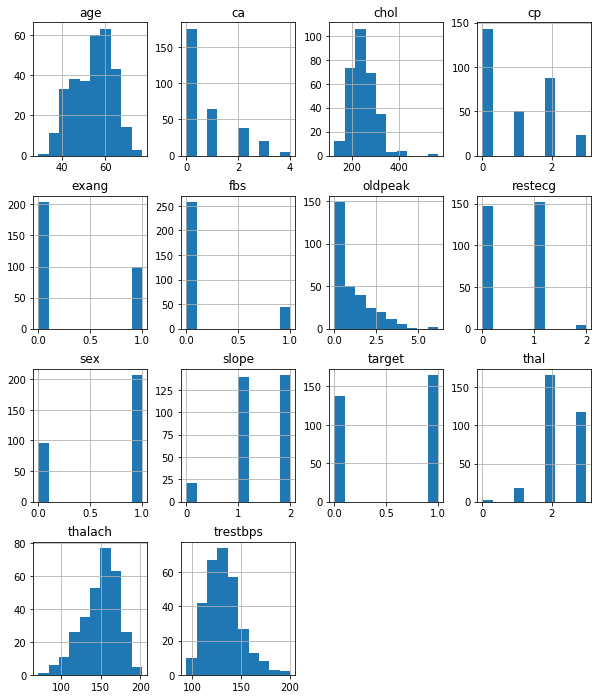

In [3]:
df.hist(figsize=(10,12))
#plt.hist(df)

In [4]:
df.info



<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139

In [5]:
# here I attempted to "stack" the histograms on top of each other... unsuccessfully. will try again later.

#for row, column in df.iterrows():
#    plt.subplot(2,2,3)
#    plt.hist(pos_subjects[column], label = '0', color = 'r')
#    plt.hist(neg_subjects[column], label = '1', color = 'b')
#    plt.legend(loc = 'upper right')
    
    
#pos_subject_hist = []
#for column in df.columns:
#    plt.hist2d(pos_subjects[column], neg_subjects[column], label = column)
#plt.pos_subject_hist.subplots(neg_subjects, label = 1)

In [6]:
# let's check our data to make sure we have valid inputs, and that they are of a certain data format
# all of our data is in the form of int, except for 'oldpeak' (which is float)

# each variable/column has 303 values, therefore no nulls exist. I also double checked that no nulls exist.

df.info()
for column in df.columns:
    print(df[column].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [7]:
# let's make a correlation table. this can help with reducing dimensionality later
cors = df.corr()
# by sorting the values, I can see which variables are most related
cors.unstack().sort_values()

oldpeak   slope      -0.577537
slope     oldpeak    -0.577537
exang     target     -0.436757
target    exang      -0.436757
oldpeak   target     -0.430696
target    oldpeak    -0.430696
thalach   age        -0.398522
age       thalach    -0.398522
cp        exang      -0.394280
exang     cp         -0.394280
target    ca         -0.391724
ca        target     -0.391724
exang     thalach    -0.378812
thalach   exang      -0.378812
oldpeak   thalach    -0.344187
thalach   oldpeak    -0.344187
thal      target     -0.344029
target    thal       -0.344029
          sex        -0.280937
sex       target     -0.280937
slope     exang      -0.257748
exang     slope      -0.257748
age       target     -0.225439
target    age        -0.225439
thalach   ca         -0.213177
ca        thalach    -0.213177
sex       chol       -0.197912
chol      sex        -0.197912
ca        cp         -0.181053
cp        ca         -0.181053
                        ...   
ca        age         0.276326
age     

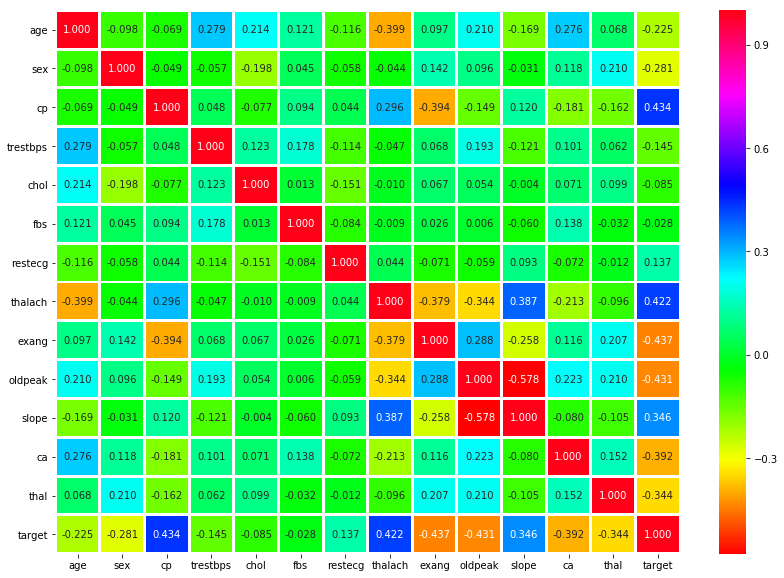

In [12]:
# we can also visualize this data with a heat map
# help was taken from the following source: https://www.kaggle.com/rajeshjnv/heart-disease-classification-neural-network

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

# from this heatmap, we can look at associations between target and each value. 

# exang, old peak, ca have negative correlations with target (in order: stronger to lesser corr) 
#       while cp, thalach, slope have positive correlations (ordered: strongest to lesser corr)

# none of the variables strongly correlate with each other, so dimensionality can't be reduced well at the moment.

In [16]:
# now let's find duplicates
df_nd = df.drop_duplicates()
print(len(df_nd))

# as we can see, there was one duplicate sample. Dataset has been updated in df_nd

302


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27b06240>,
      dtype=object)

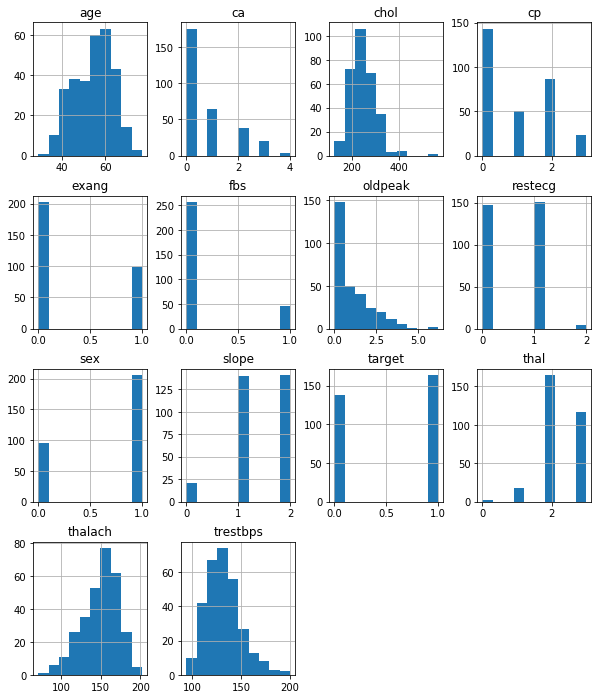

In [17]:
# after dropping duplicates, now I will look for any outliers

df_nd.hist(figsize=(10,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26bf0f60>,
      dtype=object)

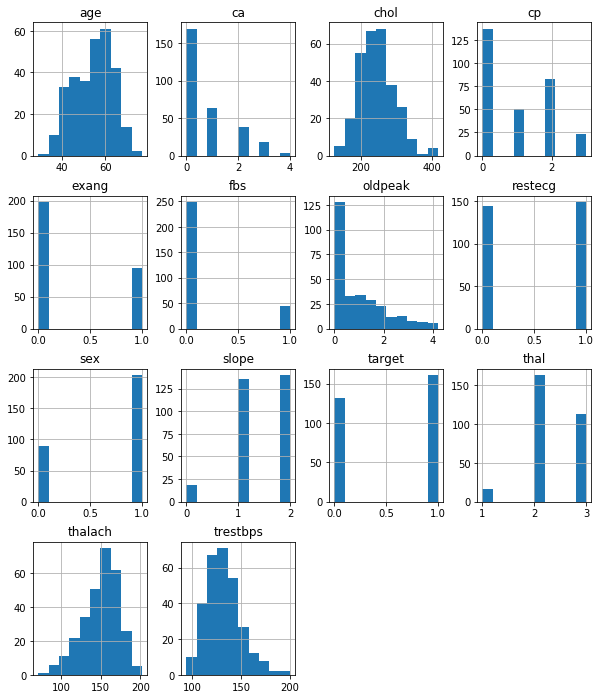

In [18]:
# areas we can look at and potentially cut out due to outliers are: 
#                 thal (too low values), restecg (too high values == 2), chol and oldpeak with values that lie a little far right

df_noo = df_nd[df_nd['restecg'] < 2]
df_noo = df_noo[df_noo['oldpeak'] < 5.0]
df_noo = df_noo[df_noo['chol'] < 450]
df_noo = df_noo[df_noo['thal'] > 0]
df_noo.hist(figsize = (10,12))

In [19]:
# looking at the histograms, there seems to be a lot of 0 values at old peak. I wonder if oldpeak is associated with a target

df_noo['oldpeak'].groupby(df_noo['target']).mean()

target
0    1.486364
1    0.580745
Name: oldpeak, dtype: float64

In [20]:
# so this seems to be a valuable trait/column. let's start a list of valuable traits 

good_traits = ['oldpeak']

# now look at slope
df_noo['slope'].groupby(df_noo['target']).mean()

target
0    1.196970
1    1.596273
Name: slope, dtype: float64

In [21]:
# slope is potentially useful, so we'll add that to our good traits. 

good_traits.append('slope')

In [22]:
# let's also look at age, chol, and ca, which seems to differ between the two targets.

#df_noo['age'].groupby(df_noo['target']).mean()
#df_noo['chol'].groupby(df_noo['target']).mean()
df_noo['ca'].groupby(df_noo['target']).mean()

# ca CERTAINLY differs between the two.
good_traits.append('ca')

In [33]:
## two methods we should look into when developing predictive models:
## 1. PCA
## 2. Random Forest

## step 1: look at 0 / 1 targets separately.
## we should split these two into 2 different DataFrames

## note : target value of '0' actually indicates the presence of heart disease

pos_subjects = df_nd[df_nd['target'] == 0]
neg_subjects = df_nd[df_nd['target'] == 1]

pos_count = len(pos_subjects)
neg_count = len(neg_subjects)

print("# pos samples: " + str(pos_count))
print("# neg samples: "+ str(neg_count))

pos_stats = pos_subjects.describe()
neg_stats = neg_subjects.describe() 

comparing = pd.DataFrame(index = df.columns, columns = [0,1,'pop_mean', 'pop_std_dev', 'chi2score', 'poszscore'])
for column in df.columns:
    comparing[0][column] = pos_subjects[column].mean()
    comparing[1][column] = neg_subjects[column].mean()
    comparing['pop_mean'][column] = df[column].mean()
    comparing['pop_std_dev'][column] = df[column].std()
    comparing['chi2score'][column] = (comparing[0][column] - comparing[1][column])/(comparing[1][column]**2)
    comparing['poszscore'][column] = (comparing[0][column] - comparing['pop_mean'][column])/(comparing['pop_std_dev'][column])
    
#comparing2 = comparing.pivot_table(index = comparing.columns, columns = comparing.index)

comparing.sort_values(by = 'poszscore')


#let's look at histograms for 0/1's separately
#df.hist(figsize = (10,12))

#pos_subjects.hist(figsize = (10,12))
#neg_subjects.hist(figsize = (10,12))

# pos samples: 138
# neg samples: 164


0         1  pop_mean pop_std_dev    chi2score  poszscore
target           0         1  0.544554    0.498835           -1   -1.09165
cp        0.478261   1.37195  0.966997     1.03205    -0.474799  -0.473557
thalach    139.101   158.378   149.647     22.9052 -0.000768494  -0.460395
slope      1.16667   1.59146   1.39934    0.616226    -0.167721  -0.377578
restecg   0.449275  0.591463  0.528053     0.52586     -0.40645  -0.149807
fbs        0.15942  0.140244  0.148515    0.356198     0.974987  0.0306162
chol       251.087    242.64   246.264     51.8308   0.00014347  0.0930515
trestbps   134.399    129.25   131.624     17.5381  0.000308194   0.158214
age        56.6014   52.5854   54.3663      9.0821   0.00145236   0.246101
sex       0.826087  0.560976  0.683168    0.466011     0.842443   0.306685
thal       2.54348   2.12195   2.31353    0.612277     0.093617   0.375561
ca         1.16667  0.341463  0.729373     1.02261      7.07738   0.427627
oldpeak    1.58551  0.586585    1.0396     1.16108      2.90315   0.470171
exang     0.550725  0.140244  0.326733    0.469794      20.8701   0.476787

In [17]:
# ok great, but how does this relate to whether our variables predict disease? 
# in order to do this, I will find the correlation for pos/neg subjects respectively

series_pos_corr = pos_subjects.corr()

series_pos_corr.drop("target")

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.141135  0.045846  0.240272  0.112610  0.069288   
sex      -0.141135  1.000000  0.158391 -0.288312 -0.222281 -0.113533   
cp        0.045846  0.158391  1.000000  0.058374 -0.043784 -0.011442   
trestbps  0.240272 -0.288312  0.058374  1.000000  0.135336  0.213452   
chol      0.112610 -0.222281 -0.043784  0.135336  1.000000  0.046234   
fbs       0.069288 -0.113533 -0.011442  0.213452  0.046234  1.000000   
restecg  -0.095330 -0.078597  0.049831 -0.089782 -0.062818 -0.105849   
thalach  -0.132751 -0.067555  0.218666  0.005595  0.045005  0.034082   
exang    -0.050885 -0.030079 -0.392959  0.041147  0.075505  0.074977   
oldpeak   0.103004 -0.090716 -0.072766  0.128450 -0.009356 -0.008879   
slope    -0.084654  0.170914  0.086124 -0.152855  0.003418 -0.094383   
ca        0.326097 -0.055165 -0.131269  0.047370  0.114714  0.177705   
thal     -0.100555  0.029239 -0.069065  0.032502  0.071232 -0.143806   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.095330 -0.132751 -0.050885  0.103004 -0.084654  0.326097   
sex      -0.078597 -0.067555 -0.030079 -0.090716  0.170914 -0.055165   
cp        0.049831  0.218666 -0.392959 -0.072766  0.086124 -0.131269   
trestbps -0.089782  0.005595  0.041147  0.128450 -0.152855  0.047370   
chol     -0.062818  0.045005  0.075505 -0.009356  0.003418  0.114714   
fbs      -0.105849  0.034082  0.074977 -0.008879 -0.094383  0.177705   
restecg   1.000000 -0.059244  0.050105  0.059092 -0.056051 -0.159378   
thalach  -0.059244  1.000000 -0.286425 -0.213269  0.350811 -0.070060   
exang     0.050105 -0.286425  1.000000  0.168676 -0.199696 -0.065389   
oldpeak   0.059092 -0.213269  0.168676  1.000000 -0.563678  0.148117   
slope    -0.056051  0.350811 -0.199696 -0.563678  1.000000  0.014539   
ca       -0.159378 -0.070060 -0.065389  0.148117  0.014539  1.000000   
thal     -0.013699  0.069523  0.057557  0.097444  0.028485 -0.035755   

              thal  target  
age      -0.100555     NaN  
sex       0.029239     NaN  
cp       -0.069065     NaN  
trestbps  0.032502     NaN  
chol      0.071232     NaN  
fbs      -0.143806     NaN  
restecg  -0.013699     NaN  
thalach   0.069523     NaN  
exang     0.057557     NaN  
oldpeak   0.097444     NaN  
slope     0.028485     NaN  
ca       -0.035755     NaN  
thal      1.000000     NaN

In [21]:
series_pc_nonan = series_pos_corr.unstack().dropna()
series_pc_nonan.sort_values()

slope     oldpeak    -0.563678
oldpeak   slope      -0.563678
cp        exang      -0.392959
exang     cp         -0.392959
trestbps  sex        -0.288312
sex       trestbps   -0.288312
thalach   exang      -0.286425
exang     thalach    -0.286425
chol      sex        -0.222281
sex       chol       -0.222281
thalach   oldpeak    -0.213269
oldpeak   thalach    -0.213269
slope     exang      -0.199696
exang     slope      -0.199696
ca        restecg    -0.159378
restecg   ca         -0.159378
trestbps  slope      -0.152855
slope     trestbps   -0.152855
fbs       thal       -0.143806
thal      fbs        -0.143806
age       sex        -0.141135
sex       age        -0.141135
thalach   age        -0.132751
age       thalach    -0.132751
cp        ca         -0.131269
ca        cp         -0.131269
sex       fbs        -0.113533
fbs       sex        -0.113533
restecg   fbs        -0.105849
fbs       restecg    -0.105849
                        ...   
sex       cp          0.158391
oldpeak 

In [ ]:
#It doesn't appear that any of the variables are strongly enough correlated to each other to 
#    make combining of variables via simple measures feasible.

